# Forecasting Time Series - In Depth

https://auto.gluon.ai/stable/tutorials/timeseries/forecasting-indepth.html

## Forecasting time series with additional information

### Static features

Static features are the time-independent attributes (metadata) of a time series.

In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_daily_subset/train.csv")
df.head()

,item_id,timestamp,target
0,D1737,1995-05-23,1900.0
1,D1737,1995-05-24,1877.0
2,D1737,1995-05-25,1873.0
3,D1737,1995-05-26,1859.0
4,D1737,1995-05-27,1876.0


In [ ]:
static_features_df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_daily_subset/metadata.csv")
static_features_df.head()

,item_id,domain
0,D1737,Industry
1,D1843,Industry
2,D2246,Finance
3,D909,Micro
4,D1345,Micro


In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
    static_features_df=static_features_df,
)
train_data.head()

target
item_id timestamp         
D1737   1995-05-23  1900.0
        1995-05-24  1877.0
        1995-05-25  1873.0
        1995-05-26  1859.0
        1995-05-27  1876.0

In [ ]:
train_data.static_features.head()

,domain
item_id,
D1737,Industry
D1843,Industry
D2246,Finance
D909,Micro
D1345,Micro


In [ ]:
predictor = TimeSeriesPredictor(prediction_length=14).fit(
    train_data,
    presets="fast_training",
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/AutogluonModels/ag-20250315_013204'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       27.78 GB / 31.31 GB (88.7%)
Disk Space Avail:   930.49 GB / 1006.85 GB (92.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series 

In [ ]:
train_data.static_features["store_id"] = list(range(len(train_data.item_ids)))
train_data.static_features.head()

,domain,store_id
item_id,,
D1737,Industry,0
D1843,Industry,1
D2246,Finance,2
D909,Micro,3
D1345,Micro,4


In [ ]:
predictor = TimeSeriesPredictor(prediction_length=14).fit(
    train_data,
    presets="fast_training",
    time_limit=10,
)

Beginning AutoGluon training... Time limit = 10s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/AutogluonModels/ag-20250315_013538'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       27.89 GB / 31.31 GB (89.1%)
Disk Space Avail:   930.37 GB / 1006.85 GB (92.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 10,
 'verbosity': 2}

Inferred time series fr

In [ ]:
train_data.static_features["store_id"] = train_data.static_features["store_id"].astype("category")

predictor = TimeSeriesPredictor(prediction_length=14).fit(
    train_data,
    presets="fast_training",
    time_limit=10,
)

Beginning AutoGluon training... Time limit = 10s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/AutogluonModels/ag-20250315_013546'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       27.88 GB / 31.31 GB (89.1%)
Disk Space Avail:   930.35 GB / 1006.85 GB (92.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 10,
 'verbosity': 2}

Inferred time series fr

### Time-varying covariates

Covariates are the time-varying features that may influence the target time series.

- known covariates that are known for the entire forecast horizon
- past covariates that are only known up to the start of the forecast horizon

In [ ]:
import numpy as np
train_data["log_target"] = np.log(train_data["target"])

WEEKEND_INDICES = [5, 6]
timestamps = train_data.index.get_level_values("timestamp")
train_data["weekend"] = timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

train_data.head()

target  log_target  weekend
item_id timestamp                              
D1737   1995-05-23  1900.0    7.549609      0.0
        1995-05-24  1877.0    7.537430      0.0
        1995-05-25  1873.0    7.535297      0.0
        1995-05-26  1859.0    7.527794      0.0
        1995-05-27  1876.0    7.536897      1.0

Predictor will automatically interpret the remaining columns (except target and known covariates) as past covariates.

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=14,
    target="target",
    known_covariates_names=["weekend"],
).fit(train_data, presets="fast_training", time_limit=10)

Beginning AutoGluon training... Time limit = 10s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/AutogluonModels/ag-20250315_013827'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       27.72 GB / 31.31 GB (88.6%)
Disk Space Avail:   930.18 GB / 1006.85 GB (92.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'very_light',
 'known_covariates_names': ['weekend'],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 10,
 'verbosity': 2}

Inferred time 

In [ ]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

known_covariates.head()

weekend
item_id timestamp          
D1737   1997-05-28      0.0
        1997-05-29      0.0
        1997-05-30      0.0
        1997-05-31      1.0
        1997-06-01      1.0

Note that known_covariates must satisfy the following conditions:

- The columns must include all columns listed in predictor.known_covariates_names
- The item_id index must include all item ids present in train_data
- The timestamp index must include the values for prediction_length many time steps into the future from the end of each time series in train_data

In [ ]:
predictor.predict(train_data, known_covariates=known_covariates)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2           0.3  \
item_id timestamp                                                          
D1737   1997-05-28   1579.747847  1480.588739  1514.590791   1539.784429   
        1997-05-29   1572.609406  1433.780708  1481.328381   1516.539422   
        1997-05-30   1561.535412  1392.265987  1450.805873   1492.857025   
        1997-05-31   1558.619578  1363.894195  1430.725463   1479.580312   
        1997-06-01   1572.639231  1354.920779  1429.391846   1483.988142   
...                          ...          ...          ...           ...   
D2345   2013-07-18  10266.923103  9761.443071  9936.373560  10064.241691   
        2013-07-19  10252.950446  9724.008715  9906.993259  10040.668928   
        2013-07-20  10230.215583  9678.856010  9869.536104  10008.760808   
        2013-07-21  10179.847419  9606.986087  9805.047227   9949.594183   
        2013-07-22  10208.918998  9616.554601  9821.717952   9971.386102   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
D1737   1997-05-28   1560.210789   1579.747810   1600.009713   1622.077364   
        1997-05-29   1545.383515   1572.609369   1600.662110   1631.419398   
        1997-05-30   1528.116527   1561.535388   1595.688530   1633.028875   
        1997-05-31   1520.177203   1558.619566   1597.822283   1640.468109   
        1997-06-01   1529.648945   1572.639170   1616.498198   1663.359896   
...                          ...           ...           ...           ...   
D2345   2013-07-18  10171.441514  10266.922614  10378.330534  10484.795570   
        2013-07-19  10152.831079  10252.950349  10368.996437  10480.423802   
        2013-07-20  10125.664404  10230.215388  10350.693191  10466.862000   
        2013-07-21  10071.045448  10179.847029  10303.343678  10423.674078   
        2013-07-22  10095.659436  10208.918608  10337.510985  10461.642565   

                             0.8           0.9  
item_id timestamp                               
D1737   1997-05-28   1646.877665   1682.427529  
        1997-05-29   1666.058001   1715.251889  
        1997-05-30   1675.216672   1734.879988  
        1997-05-31   1689.020171   1757.509623  
        1997-06-01   1717.518988   1793.784422  
...                          ...           ...  
D2345   2013-07-18  10605.289387  10772.858495  
        2013-07-19  10606.381911  10782.348319  
        2013-07-20  10598.369143  10782.031103  
        2013-07-21  10560.060374  10753.185807  
        2013-07-22  10605.811081  10804.111418  

[1400 rows x 10 columns]

## Holidays

In [ ]:
import holidays

timestamps = train_data.index.get_level_values("timestamp")
country_holidays = holidays.country_holidays(
    country="DE",  # make sure to select the correct country/region!
    # Add + 1 year to make sure that holidays are initialized for the forecast horizon
    years=range(timestamps.min().year, timestamps.max().year + 1),
)
# Convert dict to pd.Series for pretty visualization
pd.Series(country_holidays).sort_index().head()

1990-10-03             German Unity Day
1990-11-21    Repentance and Prayer Day
1990-12-25                Christmas Day
1990-12-26      Second Day of Christmas
1991-01-01               New Year's Day
dtype: object

In [ ]:
import datetime

# must cover the full train time range + forecast horizon
custom_holidays = {
    datetime.date(1995, 1, 29): "Superbowl",
    datetime.date(1995, 11, 29): "Black Friday",
    datetime.date(1996, 1, 28): "Superbowl",
    datetime.date(1996, 11, 29): "Black Friday",
    # ...
}

In [ ]:
def add_holiday_features(
    ts_df: TimeSeriesDataFrame,
    country_holidays: dict,
    include_individual_holidays: bool = True,
    include_holiday_indicator: bool = True,
) -> TimeSeriesDataFrame:
    """Add holiday indicator columns to a TimeSeriesDataFrame."""
    ts_df = ts_df.copy()
    timestamps = ts_df.index.get_level_values("timestamp")
    country_holidays_df = pd.get_dummies(pd.Series(country_holidays)).astype(float)
    holidays_df = country_holidays_df.reindex(timestamps.date).fillna(0)
    if include_individual_holidays:
        ts_df[holidays_df.columns] = holidays_df.values
    if include_holiday_indicator:
        ts_df["Holiday"] = holidays_df.max(axis=1).values
    return ts_df

In [ ]:
add_holiday_features(train_data, country_holidays, include_individual_holidays=False).head()

target  log_target  weekend  Holiday
item_id timestamp                                       
D1737   1995-05-23  1900.0    7.549609      0.0      0.0
        1995-05-24  1877.0    7.537430      0.0      0.0
        1995-05-25  1873.0    7.535297      0.0      1.0
        1995-05-26  1859.0    7.527794      0.0      0.0
        1995-05-27  1876.0    7.536897      1.0      0.0

In [ ]:
train_data_with_holidays = add_holiday_features(train_data, country_holidays)
train_data_with_holidays.head()

target  log_target  weekend  Ascension Day  \
item_id timestamp                                                
D1737   1995-05-23  1900.0    7.549609      0.0            0.0   
        1995-05-24  1877.0    7.537430      0.0            0.0   
        1995-05-25  1873.0    7.535297      0.0            1.0   
        1995-05-26  1859.0    7.527794      0.0            0.0   
        1995-05-27  1876.0    7.536897      1.0            0.0   

                    Ascension Day; Labor Day  Christmas Day  Easter Monday  \
item_id timestamp                                                            
D1737   1995-05-23                       0.0            0.0            0.0   
        1995-05-24                       0.0            0.0            0.0   
        1995-05-25                       0.0            0.0            0.0   
        1995-05-26                       0.0            0.0            0.0   
        1995-05-27                       0.0            0.0            0.0   

                    German Unity Day  Good Friday  Labor Day  New Year's Day  \
item_id timestamp                                                              
D1737   1995-05-23               0.0          0.0        0.0             0.0   
        1995-05-24               0.0          0.0        0.0             0.0   
        1995-05-25               0.0          0.0        0.0             0.0   
        1995-05-26               0.0          0.0        0.0             0.0   
        1995-05-27               0.0          0.0        0.0             0.0   

                    Reformation Day  Repentance and Prayer Day  \
item_id timestamp                                                
D1737   1995-05-23              0.0                        0.0   
        1995-05-24              0.0                        0.0   
        1995-05-25              0.0                        0.0   
        1995-05-26              0.0                        0.0   
        1995-05-27              0.0                        0.0   

                    Second Day of Christmas  Whit Monday  Holiday  
item_id timestamp                                                  
D1737   1995-05-23                      0.0          0.0      0.0  
        1995-05-24                      0.0          0.0      0.0  
        1995-05-25                      0.0          0.0      1.0  
        1995-05-26                      0.0          0.0      0.0  
        1995-05-27                      0.0          0.0      0.0

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=14,
    target="target",
    known_covariates_names=["weekend"],
).fit(train_data, presets="fast_training", time_limit=10)

In [ ]:
holiday_columns = train_data_with_holidays.columns.difference(train_data.columns)
holiday_columns

Index(['Ascension Day', 'Ascension Day; Labor Day', 'Christmas Day',
       'Easter Monday', 'German Unity Day', 'Good Friday', 'Holiday',
       'Labor Day', 'New Year's Day', 'Reformation Day',
       'Repentance and Prayer Day', 'Second Day of Christmas', 'Whit Monday'],
      dtype='object')

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=14, 
    target="target",
    known_covariates_names=holiday_columns
).fit(train_data_with_holidays, presets="fast_training", time_limit=10)

Beginning AutoGluon training... Time limit = 10s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/AutogluonModels/ag-20250315_035040'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       27.52 GB / 31.31 GB (87.9%)
Disk Space Avail:   930.14 GB / 1006.85 GB (92.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'very_light',
 'known_covariates_names': ['Ascension Day',
                            'Ascension Day; Labor Day',
                            'Christmas Day',
                            'Easter Monday',
                            'German Unity Day',
                            'Good Friday',
                            'Holiday',
           

In [ ]:
future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = add_holiday_features(pd.DataFrame(index=future_index), country_holidays)
known_covariates.head()

Ascension Day  Ascension Day; Labor Day  Christmas Day  \
item_id timestamp                                                            
D1737   1997-05-28            0.0                       0.0            0.0   
        1997-05-29            0.0                       0.0            0.0   
        1997-05-30            0.0                       0.0            0.0   
        1997-05-31            0.0                       0.0            0.0   
        1997-06-01            0.0                       0.0            0.0   

                    Easter Monday  German Unity Day  Good Friday  Labor Day  \
item_id timestamp                                                             
D1737   1997-05-28            0.0               0.0          0.0        0.0   
        1997-05-29            0.0               0.0          0.0        0.0   
        1997-05-30            0.0               0.0          0.0        0.0   
        1997-05-31            0.0               0.0          0.0        0.0   
        1997-06-01            0.0               0.0          0.0        0.0   

                    New Year's Day  Reformation Day  \
item_id timestamp                                     
D1737   1997-05-28             0.0              0.0   
        1997-05-29             0.0              0.0   
        1997-05-30             0.0              0.0   
        1997-05-31             0.0              0.0   
        1997-06-01             0.0              0.0   

                    Repentance and Prayer Day  Second Day of Christmas  \
item_id timestamp                                                        
D1737   1997-05-28                        0.0                      0.0   
        1997-05-29                        0.0                      0.0   
        1997-05-30                        0.0                      0.0   
        1997-05-31                        0.0                      0.0   
        1997-06-01                        0.0                      0.0   

                    Whit Monday  Holiday  
item_id timestamp                         
D1737   1997-05-28          0.0      0.0  
        1997-05-29          0.0      0.0  
        1997-05-30          0.0      0.0  
        1997-05-31          0.0      0.0  
        1997-06-01          0.0      0.0

In [ ]:
predictor.predict(train_data_with_holidays, known_covariates=known_covariates)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2           0.3  \
item_id timestamp                                                          
D1737   1997-05-28   1592.693848  1443.156677  1494.674352   1532.670803   
        1997-05-29   1571.657959  1363.088446  1434.890056   1487.734902   
        1997-05-30   1549.025757  1295.268301  1382.607138   1446.533695   
        1997-05-31   1540.209473  1248.386196  1348.662450   1422.062973   
        1997-06-01   1566.783936  1240.955878  1352.802392   1434.551575   
...                          ...          ...          ...           ...   
D2345   2013-07-18  10236.103516  9812.134671  9959.005416  10066.772816   
        2013-07-19  10221.987305  9778.905527  9932.337428  10044.835882   
        2013-07-20  10168.801758  9707.457543  9867.158549   9984.177470   
        2013-07-21  10081.360352  9602.499641  9768.213544   9889.568186   
        2013-07-22  10145.550781  9649.835800  9821.335449   9946.862021   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
D1737   1997-05-28   1562.874409   1592.693816   1624.614171   1657.679719   
        1997-05-29   1530.446896   1571.657920   1615.569236   1661.143171   
        1997-05-30   1498.843712   1549.025778   1601.908135   1657.080093   
        1997-05-31   1482.464498   1540.209501   1600.654796   1663.918262   
        1997-06-01   1502.097882   1566.783929   1633.592635   1703.984863   
...                          ...           ...           ...           ...   
D2345   2013-07-18  10151.093839  10236.103598  10328.837218  10424.342415   
        2013-07-19  10133.199418  10221.987615  10318.499674  10418.047384   
        2013-07-20  10076.403577  10168.802027  10268.924338  10372.334619   
        2013-07-21   9985.499007  10081.360164  10184.945182  10292.060177   
        2013-07-22  10046.357603  10145.550656  10252.467570  10363.147326   

                             0.8           0.9  
item_id timestamp                               
D1737   1997-05-28   1694.662459   1749.259241  
        1997-05-29   1712.764796   1787.663181  
        1997-05-30   1719.934530   1810.410883  
        1997-05-31   1736.242397   1839.851586  
        1997-06-01   1784.651969   1899.831417  
...                          ...           ...  
D2345   2013-07-18  10529.175763  10688.412765  
        2013-07-19  10527.611786  10693.409944  
        2013-07-20  10486.419488  10658.486752  
        2013-07-21  10410.480767  10588.560926  
        2013-07-22  10485.739846  10669.605752  

[1400 rows x 10 columns]

## What data format is expected by TimeSeriesPredictor?

AutoGluon expects that at least some time series in the training data are long enough to generate an internal validation set.

```python
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(train_data, num_val_windows=num_val_windows, val_step_size=val_step_size)
```

at least some time series in train_data must have 

```
length >= max(prediction_length + 1, 5) + prediction_length + (num_val_windows - 1) * val_step_size
```

## Handling irregular data and missing values

In [ ]:
df_irregular = TimeSeriesDataFrame(
    pd.DataFrame(
        {
            "item_id": [0, 0, 0, 1, 1],
            "timestamp": ["2022-01-01", "2022-01-02", "2022-01-04", "2022-01-01", "2022-01-04"],
            "target": [1, 2, 3, 4, 5],
        }
    )
)
df_irregular

target
item_id timestamp         
0       2022-01-01       1
        2022-01-02       2
        2022-01-04       3
1       2022-01-01       4
        2022-01-04       5

In [ ]:
df_regular = df_irregular.convert_frequency(freq="D")
df_regular

target
item_id timestamp         
0       2022-01-01     1.0
        2022-01-02     2.0
        2022-01-03     NaN
        2022-01-04     3.0
1       2022-01-01     4.0
        2022-01-02     NaN
        2022-01-03     NaN
        2022-01-04     5.0

In [ ]:
print(f"Data has frequency '{df_regular.freq}'")

Data has frequency 'D'


In [ ]:
df_filled = df_regular.fill_missing_values()
df_filled

target
item_id timestamp         
0       2022-01-01     1.0
        2022-01-02     2.0
        2022-01-03     2.0
        2022-01-04     3.0
1       2022-01-01     4.0
        2022-01-02     4.0
        2022-01-03     4.0
        2022-01-04     5.0

In [ ]:
df_filled = df_regular.fill_missing_values(method="constant", value=0.0)
df_filled

target
item_id timestamp         
0       2022-01-01     1.0
        2022-01-02     2.0
        2022-01-03     0.0
        2022-01-04     3.0
1       2022-01-01     4.0
        2022-01-02     0.0
        2022-01-03     0.0
        2022-01-04     5.0

## How to evaluate forecast accuracy?

To measure how accurately TimeSeriesPredictor can forecast unseen time series, we need to reserve some test data that won’t be used for training. This can be easily done using the `train_test_split` method of a TimeSeriesDataFrame:

In [ ]:
prediction_length = 48
data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
train_data, test_data = data.train_test_split(prediction_length)

Sorting the dataframe index before generating the train/test split.


- test_data contains exactly the same data as the original data (i.e., it contains both historic data and the forecast horizon)

- In train_data, the last prediction_length time steps are removed from the end of each time series (i.e., it contains only historic data)

In [ ]:
train_data

target
item_id timestamp                   
H1      1750-01-01 00:00:00    605.0
        1750-01-01 01:00:00    586.0
        1750-01-01 02:00:00    586.0
        1750-01-01 03:00:00    559.0
        1750-01-01 04:00:00    511.0
...                              ...
H99     1750-01-27 23:00:00  23468.0
        1750-01-28 00:00:00  22524.0
        1750-01-28 01:00:00  22090.0
        1750-01-28 02:00:00  21857.0
        1750-01-28 03:00:00  20466.0

[138460 rows x 1 columns]

In [ ]:
test_data

target
item_id timestamp                   
H1      1750-01-01 00:00:00    605.0
        1750-01-01 01:00:00    586.0
        1750-01-01 02:00:00    586.0
        1750-01-01 03:00:00    559.0
        1750-01-01 04:00:00    511.0
...                              ...
H99     1750-01-29 23:00:00  27926.0
        1750-01-30 00:00:00  26744.0
        1750-01-30 01:00:00  25829.0
        1750-01-30 02:00:00  25421.0
        1750-01-30 03:00:00  23252.0

[148060 rows x 1 columns]

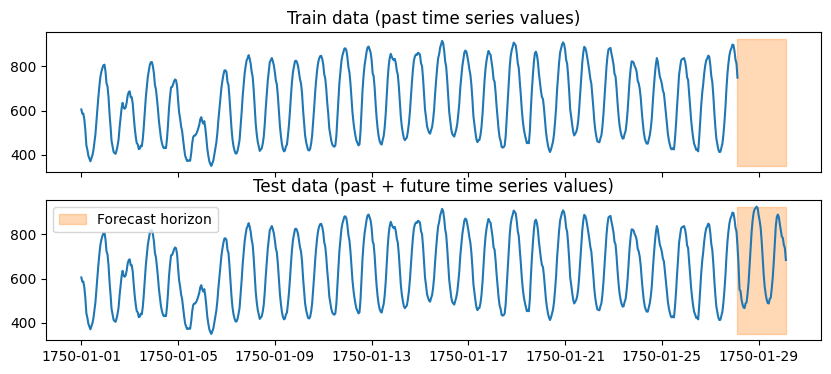

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

item_id = "H1"
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=[10, 4], sharex=True)
train_ts = train_data.loc[item_id]
test_ts = test_data.loc[item_id]
ax1.set_title("Train data (past time series values)")
ax1.plot(train_ts)
ax2.set_title("Test data (past + future time series values)")
ax2.plot(test_ts)
for ax in (ax1, ax2):
    ax.fill_between(np.array([train_ts.index[-1], test_ts.index[-1]]), test_ts.min(), test_ts.max(), color="C1", alpha=0.3, label="Forecast horizon")
plt.legend()
plt.show()

We can now use train_data to train the predictor, and test_data to obtain an estimate of its performance on unseen data.

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length, 
    eval_metric="MASE"
).fit(
    train_data,
    presets="fast_training",
    time_limit=10,
)
predictor.evaluate(test_data)

Beginning AutoGluon training... Time limit = 10s
AutoGluon will save models to '/home/usr/wsl-ws/notebooks/AutoML/Autogluon/time_series/AutogluonModels/ag-20250315_035858'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Nov 5 00:21:55 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       26.48 GB / 31.31 GB (84.6%)
Disk Space Avail:   930.00 GB / 1006.85 GB (92.4%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 10,
 'verbosity': 2}

Inferred time series f

{'MASE': -0.8866607591031733}

AutoGluon evaluates the performance of forecasting models by measuring how well their forecasts align with the actually observed time series. For each time series in test_data, the predictor does the following:

1. Hold out the last prediction_length values of the time series.
2. Generate a forecast for the held out part of the time series, i.e., the forecast horizon.
3. Quantify how well the forecast matches the actually observed (held out) values of the time series using the eval_metric.

Finally, the scores are averaged over all time series in the dataset.

## Backtesting using multiple windows

We can more accurately estimate the performance using backtest (i.e., evaluate performance on multiple forecast horizons generated from the same time series).

In [ ]:
from autogluon.timeseries.splitter import ExpandingWindowSplitter

splitter = ExpandingWindowSplitter(prediction_length=prediction_length, num_val_windows=3)
for window_idx, (train_split, val_split) in enumerate(splitter.split(test_data)):
    score = predictor.evaluate(val_split)
    print(f"Window {window_idx}: score = {score}")

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


Window 0: score = {'MASE': -0.8282448107386202}
Window 1: score = {'MASE': -0.8250579308637687}
Window 2: score = {'MASE': -0.8866607591031733}
